<h2>Import Dataset<h2>

In [47]:
import numpy as np
import pandas as pd

In [48]:
dataset = pd.read_csv(r"C:\Users\Amin Zaini\Downloads\junior-ds-takehome\src\delivery_data.csv")

In [49]:
display(dataset)

,timestamp,distance_km,weather_condition,traffic_level,package_weight,driver_rating,delivery_time_minutes
0,2023-01-11 23:15:00,6.4,Sunny,Low,-1.0,NaN,33.0
1,2023-01-01 14:20:00,7.9,Sunny,High,25.0,3.7,46.0
2,2023-01-27 11:58:00,13.3,Sunny,Medium,25.3,3.8,46.0
3,2023-02-01 01:32:00,11.8,Sunny,Low,11.5,4.2,30.0
4,2023-01-08 20:04:00,7.8,Rainy,Low,19.1,4.6,42.0
...,...,...,...,...,...,...,...
995,2023-01-09 11:19:00,6.8,Sunny,High,11.1,4.8,51.0
996,2023-01-11 22:08:00,6.0,Sunny,Medium,9.6,4.6,20.0
997,2023-01-17 03:55:00,7.8,Sunny,High,6.3,4.0,44.0
998,2023-01-05 16:18:00,2.7,Rainy,High,20.5,4.9,47.0


<h2>Data Understanding & Cleaning<h2>

In [50]:
#To check for datatypes

dataset.dtypes

timestamp                 object
distance_km              float64
weather_condition         object
traffic_level             object
package_weight           float64
driver_rating            float64
delivery_time_minutes    float64
dtype: object

In [51]:
#From step above, weather condition & traffic level are Categorical data, let's what are the possible values

display(dataset["weather_condition"].unique())
display(dataset["traffic_level"].unique())

#Now I have the idea of how to deal with the catgorical columns, weather to one-hot encode both or apply ordinal encoding to traffic_level

array(['Sunny', 'Rainy', 'Cloudy', 'Stormy'], dtype=object)

array(['Low', 'High', 'Medium'], dtype=object)

In [52]:
#To check stats for all data features

dataset.describe()

#-ve values exist in package_weight which is not logical, weight metric should always be >0. 

,distance_km,package_weight,driver_rating,delivery_time_minutes
count,1000.000000,1000.000000,950.000000,1000.000000
mean,10.500000,14.837700,3.980105,45.880000
std,5.527789,8.702938,0.571388,14.430726
min,1.100000,-1.000000,3.000000,11.000000
25%,5.500000,7.300000,3.500000,35.750000
50%,10.600000,14.950000,4.000000,46.000000
75%,15.100000,22.600000,4.500000,56.000000
max,20.000000,29.900000,5.000000,93.000000


In [53]:
#Next question is how many rows have -ve values?

display((dataset.select_dtypes(include='number') < 0).sum())

#Around 20 rows have -ve values, that is around 2% of the dataset, so I will remove those rows (Data anomalies)

len(dataset)


distance_km               0
package_weight           20
driver_rating             0
delivery_time_minutes     0
dtype: int64

1000

In [54]:
dataset = dataset[(dataset[["package_weight"]] >= 0).all(axis=1)]

display((dataset.select_dtypes(include='number') < 0).sum())

#rows with -ve values removed, and now we should have 980 rows with 0 -ve values

len(dataset)


distance_km              0
package_weight           0
driver_rating            0
delivery_time_minutes    0
dtype: int64

980

In [55]:
#To check for missing values

dataset.isna().sum()

#Identified that driver_rating has 40 rows with missing values, hence it need be replaced with col mean

timestamp                 0
distance_km               0
weather_condition         0
traffic_level             0
package_weight            0
driver_rating            40
delivery_time_minutes     0
dtype: int64

In [56]:
#Find value of col mean, fill into null

median_rating = dataset["driver_rating"].median()

dataset["driver_rating"] = dataset["driver_rating"].fillna(median_rating)

dataset.isna().sum()

#Recheck, now no more null in the dataset

timestamp                0
distance_km              0
weather_condition        0
traffic_level            0
package_weight           0
driver_rating            0
delivery_time_minutes    0
dtype: int64

In [57]:
dataset.dtypes

timestamp                 object
distance_km              float64
weather_condition         object
traffic_level             object
package_weight           float64
driver_rating            float64
delivery_time_minutes    float64
dtype: object

<h2>Feature Extraction & Engineer<h2>

In [58]:
#Create more featues from time & date, to help infer information for model training

#timestamp col was originally an object datatype, hence it need convertion to datetime
dataset["timestamp"] = pd.to_datetime(dataset["timestamp"])

#dataset["Year"] = dataset["timestamp"].dt.year (No need as dataset range is within 1 same year)

dataset["Hour"] = dataset["timestamp"].dt.hour

dataset["Month"] = dataset["timestamp"].dt.month

dataset["DayOfWeek"] = dataset["timestamp"].dt.dayofweek   
dataset["DayOfMonth"] = dataset["timestamp"].dt.day

dataset["WeekOfMonth"] = dataset["timestamp"].dt.day.sub(1) // 7 + 1
dataset["WeekOfYear"] = dataset["timestamp"].dt.isocalendar().week.astype(int)

dataset["IsWeekend"] = dataset["DayOfWeek"].isin([5, 6]).astype(int)

display(dataset)


,timestamp,distance_km,weather_condition,traffic_level,package_weight,driver_rating,delivery_time_minutes,Hour,Month,DayOfWeek,DayOfMonth,WeekOfMonth,WeekOfYear,IsWeekend
1,2023-01-01 14:20:00,7.9,Sunny,High,25.0,3.7,46.0,14,1,6,1,1,52,1
2,2023-01-27 11:58:00,13.3,Sunny,Medium,25.3,3.8,46.0,11,1,4,27,4,4,0
3,2023-02-01 01:32:00,11.8,Sunny,Low,11.5,4.2,30.0,1,2,2,1,1,5,0
4,2023-01-08 20:04:00,7.8,Rainy,Low,19.1,4.6,42.0,20,1,6,8,2,1,1
5,2023-01-05 08:25:00,19.7,Sunny,Medium,3.3,3.9,59.0,8,1,3,5,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2023-01-09 11:19:00,6.8,Sunny,High,11.1,4.8,51.0,11,1,0,9,2,2,0
996,2023-01-11 22:08:00,6.0,Sunny,Medium,9.6,4.6,20.0,22,1,2,11,2,2,0
997,2023-01-17 03:55:00,7.8,Sunny,High,6.3,4.0,44.0,3,1,1,17,3,3,0
998,2023-01-05 16:18:00,2.7,Rainy,High,20.5,4.9,47.0,16,1,3,5,1,1,0


In [59]:
#Changing traffic_level to ordinal data, less catgorigal features = better model accuracy

from sklearn.preprocessing import OrdinalEncoder

#Define ordinal order explicitly
traffic_order = [["Low", "Medium", "High"]]

#Encoder
ordinal_encoder = OrdinalEncoder(categories=traffic_order)

#Encoding
dataset["traffic_level_ord"] = ordinal_encoder.fit_transform(
    dataset[["traffic_level"]]
).astype(int)

display(dataset[["traffic_level", "traffic_level_ord"]].drop_duplicates().sort_values("traffic_level_ord")
)

#Check the new ordinal mapping

,traffic_level,traffic_level_ord
3,Low,0
2,Medium,1
1,High,2


<h2>Statistical, Linearlity Check (Using OLS) & Features Selection<h2>

In [60]:
import statsmodels.api as sm
from IPython.display import display
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_absolute_error, r2_score

<h3>Round 1<h3>
Original Data Features

In [61]:
#Fit entire dataset into OLS to check statistical significance of the dataset - analyse r2 & feature P-Values

#Round 1 - Original Data Features

targets = [
    'delivery_time_minutes'
]

numeric_features = [
    "distance_km",
    "traffic_level_ord", "package_weight", "driver_rating"
]

categorical_features = [
    "weather_condition"
]


base_cols = numeric_features + categorical_features + targets
sub_data = dataset[base_cols].copy()

sub_data[numeric_features] = sub_data[numeric_features].apply(
    pd.to_numeric, errors="coerce"
)
sub_data[targets] = sub_data[targets].apply(
    pd.to_numeric, errors="coerce"
)


#onehot
ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

X_cat_array = ohe.fit_transform(
    sub_data[categorical_features]
)

X_cat = pd.DataFrame(
    X_cat_array,
    columns=ohe.get_feature_names_out(categorical_features),
    index=sub_data.index
)


#Scale
X_num = sub_data[numeric_features]

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=X_num.columns,
    index=X_num.index
)

X_base = pd.concat([X_num_scaled, X_cat], axis=1)
X_base = X_base.apply(pd.to_numeric, errors="coerce")

results_by_target = {}

for target in targets:

    y = sub_data[target]

    #Combine X & y and drop NaNs
    combined = pd.concat([X_base, y], axis=1)
    X = combined[X_base.columns]
    y_clean = combined[target]

    #Add intercept
    X_const = sm.add_constant(X)

    #Convert to numpy
    X_np = X_const.values.astype(float)
    y_np = y_clean.values.astype(float)

    #Fit OLS
    model = sm.OLS(y_np, X_np)
    result = model.fit()

    y_pred = result.predict(X_np)

    r2 = r2_score(y_np, y_pred)
    mae = mean_absolute_error(y_np, y_pred)

    mape = np.mean(
        np.abs((y_np - y_pred) / np.where(y_np == 0, np.nan, y_np))
    ) * 100

    metrics = pd.DataFrame({
        "Metric": ["R²", "MAE", "MAPE (%)"],
        "Value": [round(r2, 4), round(mae, 2), round(mape, 2)]
    })

    print(f"\nModel performance to target — {target}")
    display(metrics)

    coef_table = pd.DataFrame({
        "Variable": X_const.columns,
        "Coefficient": result.params,
        "Std_Error": result.bse,
        "t": result.tvalues,
        "P_Value": result.pvalues
    })

    coef_table[["Coefficient", "Std_Error", "t", "P_Value"]] = (
        coef_table[["Coefficient", "Std_Error", "t", "P_Value"]].round(3)
    )

    coef_table["Significant"] = np.where(
        coef_table["P_Value"] < 0.05, "Yes",
        np.where(coef_table["P_Value"] < 0.10, "Ok", "No")
    )

    print(f"Rows used: {len(y_np):,}")
    display(coef_table)

    results_by_target[target] = {
        "metrics": metrics,
        "coefficients": coef_table,
        "model": result
    }



Model performance to target — delivery_time_minutes


,Metric,Value
0,R²,0.8791
1,MAE,3.9700
2,MAPE (%),10.0800


Rows used: 980


,Variable,Coefficient,Std_Error,t,P_Value,Significant
0,const,40.291,0.183,220.552,0.000,Yes
1,distance_km,11.057,0.162,68.286,0.000,Yes
2,traffic_level_ord,6.055,0.162,37.459,0.000,Yes
3,package_weight,0.020,0.162,0.121,0.904,No
4,driver_rating,-0.088,0.162,-0.543,0.587,No
5,weather_condition_Cloudy,3.889,0.381,10.203,0.000,Yes
6,weather_condition_Rainy,12.697,0.329,38.636,0.000,Yes
7,weather_condition_Stormy,21.727,0.569,38.195,0.000,Yes
8,weather_condition_Sunny,1.978,0.245,8.084,0.000,Yes



Fitting dataset to OLD using original features gives 0.87 R2 and 10% of average percentage error. 87% of the dataset able tells info translating to delivery time.

Additionally, result tells that all features are statistically significance Pval (<0.05), which is such a good indicator to our objective.

Now lets try to fit in original features + new engineered feature to see weather we get better R2 and MAPE

package_weight and driver_rating is not statistically significance, hence we will remove it from the model training since it does not statistically translate to delvery time





<h3>Round 2<h3>
Original Data Features + Engineered Features

In [62]:
#Round 2 - Original Data Features + Engineered Features

targets = [
    'delivery_time_minutes'
]

numeric_features = [
    "distance_km",
    "traffic_level_ord", 
    "Hour", "Month", "DayOfWeek", "DayOfMonth", "WeekOfMonth", "WeekOfYear", "IsWeekend"
]

categorical_features = [
    "weather_condition"
]


base_cols = numeric_features + categorical_features + targets
sub_data = dataset[base_cols].copy()

sub_data[numeric_features] = sub_data[numeric_features].apply(
    pd.to_numeric, errors="coerce"
)
sub_data[targets] = sub_data[targets].apply(
    pd.to_numeric, errors="coerce"
)

#onehot
ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

X_cat_array = ohe.fit_transform(
    sub_data[categorical_features]
)

X_cat = pd.DataFrame(
    X_cat_array,
    columns=ohe.get_feature_names_out(categorical_features),
    index=sub_data.index
)

#Scale
X_num = sub_data[numeric_features]

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=X_num.columns,
    index=X_num.index
)

X_base = pd.concat([X_num_scaled, X_cat], axis=1)
X_base = X_base.apply(pd.to_numeric, errors="coerce")

results_by_target = {}

for target in targets:

    y = sub_data[target]

    #Combine X & y and drop NaNs
    combined = pd.concat([X_base, y], axis=1)
    X = combined[X_base.columns]
    y_clean = combined[target]

    #Add intercept
    X_const = sm.add_constant(X)

    #Convert to numpy
    X_np = X_const.values.astype(float)
    y_np = y_clean.values.astype(float)

    #Fit OLS
    model = sm.OLS(y_np, X_np)
    result = model.fit()

    y_pred = result.predict(X_np)

    r2 = r2_score(y_np, y_pred)
    mae = mean_absolute_error(y_np, y_pred)

    mape = np.mean(
        np.abs((y_np - y_pred) / np.where(y_np == 0, np.nan, y_np))
    ) * 100

    metrics = pd.DataFrame({
        "Metric": ["R²", "MAE", "MAPE (%)"],
        "Value": [round(r2, 4), round(mae, 2), round(mape, 2)]
    })

    print(f"\nModel performance to target — {target}")
    display(metrics)

    coef_table = pd.DataFrame({
        "Variable": X_const.columns,
        "Coefficient": result.params,
        "Std_Error": result.bse,
        "t": result.tvalues,
        "P_Value": result.pvalues
    })

    coef_table[["Coefficient", "Std_Error", "t", "P_Value"]] = (
        coef_table[["Coefficient", "Std_Error", "t", "P_Value"]].round(3)
    )

    coef_table["Significant"] = np.where(
        coef_table["P_Value"] < 0.05, "Yes",
        np.where(coef_table["P_Value"] < 0.10, "Ok", "No")
    )

    print(f"Rows used: {len(y_np):,}")
    display(coef_table)

    results_by_target[target] = {
        "metrics": metrics,
        "coefficients": coef_table,
        "model": result
    }




Model performance to target — delivery_time_minutes


,Metric,Value
0,R²,0.8806
1,MAE,3.9400
2,MAPE (%),10.0000


Rows used: 980


,Variable,Coefficient,Std_Error,t,P_Value,Significant
0,const,40.254,0.183,220.486,0.000,Yes
1,distance_km,11.057,0.162,68.412,0.000,Yes
2,traffic_level_ord,6.070,0.162,37.579,0.000,Yes
3,Hour,-0.137,0.162,-0.849,0.396,No
4,Month,0.229,0.188,1.213,0.225,No
5,DayOfWeek,0.739,0.295,2.507,0.012,Yes
6,DayOfMonth,-0.669,0.947,-0.706,0.480,No
7,WeekOfMonth,0.875,0.920,0.951,0.342,No
8,WeekOfYear,0.191,0.186,1.022,0.307,No
9,IsWeekend,-0.642,0.282,-2.277,0.023,Yes



With addition features derived from timestamp column, only small difference in r2, MAE, and MAPE improvement achived

However, it tells that DayOfWeek & isWeekend are the only significance features derived from timestamp within all X input relative to Y target. 

Hour and other non significant features will also be removed from X features for training





<h3>Round 3<h3>
Original Data Features + DayOfWeek & isWeekend only (Significant Only)

In [63]:
#Round 3 - Original Data Features + DayOfWeek & isWeekend only (Significant Only)

targets = [
    'delivery_time_minutes'
]

numeric_features = [
    "distance_km",
    "traffic_level_ord", 
    "DayOfWeek", "IsWeekend"
]

categorical_features = [
    "weather_condition"
]


base_cols = numeric_features + categorical_features + targets
sub_data = dataset[base_cols].copy()

sub_data[numeric_features] = sub_data[numeric_features].apply(
    pd.to_numeric, errors="coerce"
)
sub_data[targets] = sub_data[targets].apply(
    pd.to_numeric, errors="coerce"
)

#onehot
ohe = OneHotEncoder(      
    sparse_output=False,
    handle_unknown="ignore"
)

X_cat_array = ohe.fit_transform(
    sub_data[categorical_features]
)

X_cat = pd.DataFrame(
    X_cat_array,
    columns=ohe.get_feature_names_out(categorical_features),
    index=sub_data.index
)

#Scale
X_num = sub_data[numeric_features]

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=X_num.columns,
    index=X_num.index
)

X_base = pd.concat([X_num_scaled, X_cat], axis=1)
X_base = X_base.apply(pd.to_numeric, errors="coerce")

results_by_target = {}

for target in targets:

    y = sub_data[target]

    #Combine X & y and drop NaNs
    combined = pd.concat([X_base, y], axis=1)
    X = combined[X_base.columns]
    y_clean = combined[target]

    #Add intercept
    X_const = sm.add_constant(X)

    #Convert to numpy
    X_np = X_const.values.astype(float)
    y_np = y_clean.values.astype(float)

    #Fit OLS
    model = sm.OLS(y_np, X_np)
    result = model.fit()

    y_pred = result.predict(X_np)

    r2 = r2_score(y_np, y_pred)
    mae = mean_absolute_error(y_np, y_pred)

    mape = np.mean(
        np.abs((y_np - y_pred) / np.where(y_np == 0, np.nan, y_np))
    ) * 100

    metrics = pd.DataFrame({
        "Metric": ["R²", "MAE", "MAPE (%)"],
        "Value": [round(r2, 4), round(mae, 2), round(mape, 2)]
    })

    print(f"\nModel performance to target — {target}")
    display(metrics)

    coef_table = pd.DataFrame({
        "Variable": X_const.columns,
        "Coefficient": result.params,
        "Std_Error": result.bse,
        "t": result.tvalues,
        "P_Value": result.pvalues
    })

    coef_table[["Coefficient", "Std_Error", "t", "P_Value"]] = (
        coef_table[["Coefficient", "Std_Error", "t", "P_Value"]].round(3)
    )

    coef_table["Significant"] = np.where(
        coef_table["P_Value"] < 0.05, "Yes",
        np.where(coef_table["P_Value"] < 0.10, "Ok", "No")
    )

    print(f"Rows used: {len(y_np):,}")
    display(coef_table)

    results_by_target[target] = {
        "metrics": metrics,
        "coefficients": coef_table,
        "model": result
    }




Model performance to target — delivery_time_minutes


,Metric,Value
0,R²,0.8799
1,MAE,3.9500
2,MAPE (%),10.0100


Rows used: 980


,Variable,Coefficient,Std_Error,t,P_Value,Significant
0,const,40.269,0.182,221.059,0.000,Yes
1,distance_km,11.058,0.162,68.407,0.000,Yes
2,traffic_level_ord,6.065,0.161,37.643,0.000,Yes
3,DayOfWeek,0.668,0.259,2.581,0.010,Yes
4,IsWeekend,-0.526,0.259,-2.036,0.042,Yes
5,weather_condition_Cloudy,3.884,0.380,10.229,0.000,Yes
6,weather_condition_Rainy,12.721,0.326,38.975,0.000,Yes
7,weather_condition_Stormy,21.651,0.567,38.201,0.000,Yes
8,weather_condition_Sunny,2.013,0.244,8.249,0.000,Yes


Considering DayOfWeek & isWeekend is sufficient to infer abit more information into the main original features, resulting to slightly better result, r2 and MAPE.





<h3>Round 4<h3>
Original Data Features + DayOfWeek & isWeekend only (DayOfWeek as Categorical Feature, Day number should not be discrete)

In [64]:
#Round 4 - Original Data Features + DayOfWeek & isWeekend only (DayOfWeek as Categorical Feature, Day number should not be discrete)

targets = [
    'delivery_time_minutes'
]

numeric_features = [
    "distance_km",
    "traffic_level_ord", "IsWeekend"
]

categorical_features = [
    "weather_condition" ,
    "DayOfWeek"
]


base_cols = numeric_features + categorical_features + targets
sub_data = dataset[base_cols].copy()

sub_data[numeric_features] = sub_data[numeric_features].apply(
    pd.to_numeric, errors="coerce"
)
sub_data[targets] = sub_data[targets].apply(
    pd.to_numeric, errors="coerce"
)

#onehot
ohe = OneHotEncoder(           
    sparse_output=False,
    handle_unknown="ignore"
)

X_cat_array = ohe.fit_transform(
    sub_data[categorical_features]
)

X_cat = pd.DataFrame(
    X_cat_array,
    columns=ohe.get_feature_names_out(categorical_features),
    index=sub_data.index
)

#Scale
X_num = sub_data[numeric_features]

scaler = StandardScaler()
X_num_scaled = pd.DataFrame(
    scaler.fit_transform(X_num),
    columns=X_num.columns,
    index=X_num.index
)

X_base = pd.concat([X_num_scaled, X_cat], axis=1)
X_base = X_base.apply(pd.to_numeric, errors="coerce")

results_by_target = {}

for target in targets:

    y = sub_data[target]

    # Combine X & y and drop NaNs
    combined = pd.concat([X_base, y], axis=1)
    X = combined[X_base.columns]
    y_clean = combined[target]

    # Add intercept
    X_const = sm.add_constant(X)

    # Convert to numpy
    X_np = X_const.values.astype(float)
    y_np = y_clean.values.astype(float)

    # Fit OLS
    model = sm.OLS(y_np, X_np)
    result = model.fit()

    y_pred = result.predict(X_np)

    r2 = r2_score(y_np, y_pred)
    mae = mean_absolute_error(y_np, y_pred)

    mape = np.mean(
        np.abs((y_np - y_pred) / np.where(y_np == 0, np.nan, y_np))
    ) * 100

    metrics = pd.DataFrame({
        "Metric": ["R²", "MAE", "MAPE (%)"],
        "Value": [round(r2, 4), round(mae, 2), round(mape, 2)]
    })

    print(f"\nModel performance to target — {target}")
    display(metrics)

    coef_table = pd.DataFrame({
        "Variable": X_const.columns,
        "Coefficient": result.params,
        "Std_Error": result.bse,
        "t": result.tvalues,
        "P_Value": result.pvalues
    })

    coef_table[["Coefficient", "Std_Error", "t", "P_Value"]] = (
        coef_table[["Coefficient", "Std_Error", "t", "P_Value"]].round(3)
    )

    coef_table["Significant"] = np.where(
        coef_table["P_Value"] < 0.05, "Yes",
        np.where(coef_table["P_Value"] < 0.10, "Ok", "No")
    )

    print(f"Rows used: {len(y_np):,}")
    display(coef_table)

    results_by_target[target] = {
        "metrics": metrics,
        "coefficients": coef_table,
        "model": result
    }




Model performance to target — delivery_time_minutes


,Metric,Value
0,R²,0.8802
1,MAE,3.9400
2,MAPE (%),10.0100


Rows used: 980


,Variable,Coefficient,Std_Error,t,P_Value,Significant
0,const,36.124,0.164,220.155,0.000,Yes
1,distance_km,11.051,0.162,68.202,0.000,Yes
2,traffic_level_ord,6.080,0.162,37.581,0.000,Yes
3,IsWeekend,0.104,0.142,0.732,0.464,No
4,weather_condition_Cloudy,2.847,0.380,7.485,0.000,Yes
5,weather_condition_Rainy,11.690,0.328,35.603,0.000,Yes
6,weather_condition_Stormy,20.627,0.567,36.410,0.000,Yes
7,weather_condition_Sunny,0.959,0.247,3.877,0.000,Yes
8,DayOfWeek_0,4.709,0.394,11.961,0.000,Yes
9,DayOfWeek_1,5.044,0.376,13.414,0.000,Yes


Model Performance
Rows: 980
R²   : 0.8802
MAE  : 3.94
MAPE : 10.01%


,Feature,Coefficient,Contribution,P_Value,AbsCoef,Importance_%
0,weather_condition_Stormy,20.6273,0.0000,0.0000,20.6273,23.0515
1,weather_condition_Rainy,11.6901,0.0000,0.0000,11.6901,13.0639
2,distance_km,11.0509,0.2324,0.0000,11.0509,12.3496
3,DayOfWeek_4,6.1075,0.0000,0.0000,6.1075,6.8253
4,traffic_level_ord,6.0805,0.1580,0.0000,6.0805,6.7951
5,DayOfWeek_6,5.4558,0.0000,0.0000,5.4558,6.0969
6,DayOfWeek_3,5.2907,0.0000,0.0000,5.2907,5.9125
7,DayOfWeek_1,5.0438,0.0000,0.0000,5.0438,5.6365
8,DayOfWeek_2,5.0115,0.0000,0.0000,5.0115,5.6005
9,DayOfWeek_0,4.7085,0.0000,0.0000,4.7085,5.2619


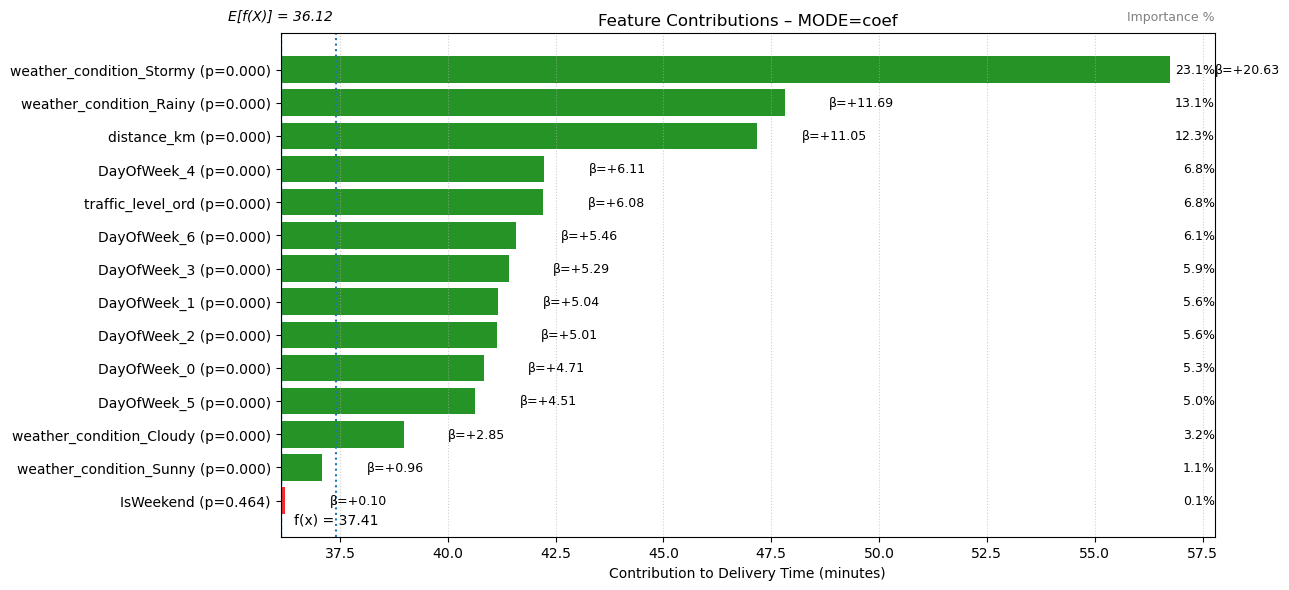

With only 5 X features, we now achieved >0.88 r2, which is such an excellent indicator to our objective. 


Analysis

Distance is a strong and statistically significant driver of delivery time.
- A +1 km increase in delivery distance adds approximately +11.05 minutes to delivery time, indicating a clear positive correlation.

Traffic level also has a meaningful impact.
- A +1 unit increase in traffic level results in an additional ~6.08 minutes of delivery time.

Weather Effects

Weather is the most influential factor affecting delivery time.
- Stormy conditions have the largest impact, increasing delivery time by approximately +20.63 minutes.
- Rainy conditions also significantly delay deliveries, adding around +11.7 minutes.

Sunny weather is the most favorable condition, showing the lowest coefficient and minimal impact compared to other weather types.

<h2>One to One Relationship - Given that all other Xs are held constant<h2>


Analysis above explained magnitude and direction of relationships (with intercorrelation or multi variables)

Now I need to see magnitude of spesific Xn to Y, while held other betas/Xs controled

Ref: https://medium.com/data-science/the-fwl-theorem-or-how-to-make-all-regressions-intuitive-59f801eb3299

In [65]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display
from sklearn.metrics import r2_score, mean_absolute_error

Rows used for analysis: 980


,Variable,Coefficient (minutes),Std Error,t-stat,p-value,Note
0,Intercept,0.000,0.160,0.000,1.0,Raw residuals
1,Distance (Adjusted),1.998,0.029,68.554,0.0,Raw residuals


,Variable,Coefficient (minutes),Std Error,t-stat,p-value,Note
0,Intercept,24.933,0.345,72.274,0.0,Mean-shifted
1,Distance (Adjusted),1.998,0.029,68.554,0.0,Mean-shifted



Partial Reg Model Performance
R²  : 0.8277
MAE : 3.94 minutes


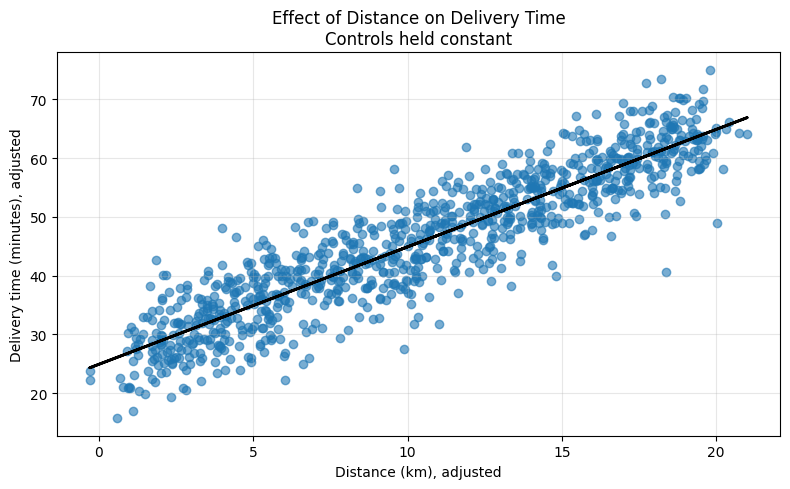

In [66]:
#set target and main variable
y_col = "delivery_time_minutes"
x_col = "distance_km"

#numeric controls to hold constant
numeric_controls = [
    "traffic_level_ord",
    "IsWeekend"
]

#categorical controls
categorical_controls = [
    "weather_condition",
    "DayOfWeek"
]

#select required columns only
base_cols = [y_col, x_col] + numeric_controls + categorical_controls
df_raw = dataset[base_cols].copy()


#onehot encoding
ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

X_cat_array = ohe.fit_transform(
    sub_data[categorical_features]
)

X_cat = pd.DataFrame(
    X_cat_array,
    columns=ohe.get_feature_names_out(categorical_features),
    index=sub_data.index
)


#combine numeric and categorical controls
X_num = df_raw[numeric_controls].astype(float)
X_all = pd.concat([X_num, X_cat], axis=1)

#final dataset for analysis
df = pd.concat(
    [df_raw[[y_col, x_col]], X_all],
    axis=1
).dropna()

print(f"Rows used for analysis: {len(df):,}")

#split target and main variable
Y = df[y_col].values
X_interest = df[x_col].values

#add constant to controls
X_controls = sm.add_constant(df[X_all.columns].values)


#remove control effects from delivery time
model_y = sm.OLS(Y, X_controls).fit()
Y_resid = model_y.resid

#remove control effects from distance
model_x = sm.OLS(X_interest, X_controls).fit()
X_resid = model_x.resid


#estimate pure distance effect using residuals
model_resid = sm.OLS(
    Y_resid,
    sm.add_constant(X_resid)
).fit()


#shift residuals back to original scale
X_resid_shifted = X_resid + df[x_col].mean()
Y_resid_shifted = Y_resid + df[y_col].mean()


#refit model on shifted values for interpretation
model_shifted = sm.OLS(
    Y_resid_shifted,
    sm.add_constant(X_resid_shifted)
).fit()


#summary table using raw residuals
table_raw = pd.DataFrame({
    "Variable": ["Intercept", "Distance (Adjusted)"],
    "Coefficient (minutes)": model_resid.params.round(3),
    "Std Error": model_resid.bse.round(3),
    "t-stat": model_resid.tvalues.round(3),
    "p-value": model_resid.pvalues.round(4),
    "Note": ["Raw residuals", "Raw residuals"]
})

display(table_raw)


#summary table using shifted values
table_shifted = pd.DataFrame({
    "Variable": ["Intercept", "Distance (Adjusted)"],
    "Coefficient (minutes)": model_shifted.params.round(3),
    "Std Error": model_shifted.bse.round(3),
    "t-stat": model_shifted.tvalues.round(3),
    "p-value": model_shifted.pvalues.round(4),
    "Note": ["Mean-shifted", "Mean-shifted"]
})

display(table_shifted)


#evaluate model fit on residual space
y_hat = model_resid.predict(sm.add_constant(X_resid))
r2 = r2_score(Y_resid, y_hat)
mae = mean_absolute_error(Y_resid, y_hat)

print("\nPartial Reg Model Performance")
print(f"R²  : {r2:.4f}")
print(f"MAE : {mae:.2f} minutes")


#visualize adjusted relationship
plt.figure(figsize=(8, 5))

plt.scatter(
    X_resid_shifted,
    Y_resid_shifted,
    alpha=0.6
)

plt.plot(
    X_resid_shifted,
    model_shifted.predict(sm.add_constant(X_resid_shifted)),
    linewidth=2,
    color="black"
)

plt.xlabel("Distance (km), adjusted")
plt.ylabel("Delivery time (minutes), adjusted")

plt.title(
    "Effect of Distance on Delivery Time\n"
    "Controls held constant"
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h3>When other factors are held constant, I can clearly see that a one-unit increase in distance translates into an average increase of about 2 minutes in delivery time. This reflects a clean one-to-one relationship, while still acknowledging that other operational factors continue to exist and influence outcomes.<h3>

Rows used for analysis: 980


,Variable,Coefficient (minutes),Std Error,t-stat,p-value,Note
0,Intercept,0.000,0.160,0.000,1.0,Raw residuals
1,Distance (Adjusted),7.373,0.195,37.774,0.0,Raw residuals


,Variable,Coefficient (minutes),Std Error,t-stat,p-value,Note
0,Intercept,38.666,0.249,155.142,0.0,Mean-shifted
1,Distance (Adjusted),7.373,0.195,37.774,0.0,Mean-shifted



Partial Reg Model Performance
R²  : 0.5933
MAE : 3.94 minutes


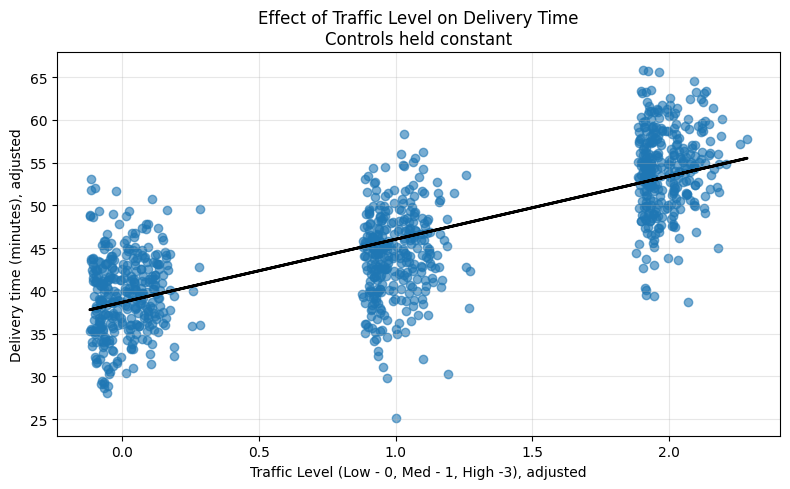

In [67]:
#set target and main variable
y_col = "delivery_time_minutes"
x_col = "traffic_level_ord"

#numeric controls to hold constant
numeric_controls = [
    "distance_km",
    "IsWeekend"
]

#categorical controls
categorical_controls = [
    "weather_condition",
    "DayOfWeek"
]

#select required columns only
base_cols = [y_col, x_col] + numeric_controls + categorical_controls
df_raw = dataset[base_cols].copy()


#onehot encoding
ohe = OneHotEncoder(
    sparse_output=False,
    handle_unknown="ignore"
)

X_cat_array = ohe.fit_transform(
    sub_data[categorical_features]
)

X_cat = pd.DataFrame(
    X_cat_array,
    columns=ohe.get_feature_names_out(categorical_features),
    index=sub_data.index
)


#combine numeric and categorical controls
X_num = df_raw[numeric_controls].astype(float)
X_all = pd.concat([X_num, X_cat], axis=1)

#final dataset for analysis
df = pd.concat(
    [df_raw[[y_col, x_col]], X_all],
    axis=1
).dropna()

print(f"Rows used for analysis: {len(df):,}")

#split target and main variable
Y = df[y_col].values
X_interest = df[x_col].values

#add constant to controls
X_controls = sm.add_constant(df[X_all.columns].values)


#remove control effects from delivery time
model_y = sm.OLS(Y, X_controls).fit()
Y_resid = model_y.resid

#remove control effects from distance
model_x = sm.OLS(X_interest, X_controls).fit()
X_resid = model_x.resid


#estimate pure distance effect using residuals
model_resid = sm.OLS(
    Y_resid,
    sm.add_constant(X_resid)
).fit()


#shift residuals back to original scale
X_resid_shifted = X_resid + df[x_col].mean()
Y_resid_shifted = Y_resid + df[y_col].mean()


#refit model on shifted values for interpretation
model_shifted = sm.OLS(
    Y_resid_shifted,
    sm.add_constant(X_resid_shifted)
).fit()


#summary table using raw residuals
table_raw = pd.DataFrame({
    "Variable": ["Intercept", "Distance (Adjusted)"],
    "Coefficient (minutes)": model_resid.params.round(3),
    "Std Error": model_resid.bse.round(3),
    "t-stat": model_resid.tvalues.round(3),
    "p-value": model_resid.pvalues.round(4),
    "Note": ["Raw residuals", "Raw residuals"]
})

display(table_raw)


#summary table using shifted values
table_shifted = pd.DataFrame({
    "Variable": ["Intercept", "Distance (Adjusted)"],
    "Coefficient (minutes)": model_shifted.params.round(3),
    "Std Error": model_shifted.bse.round(3),
    "t-stat": model_shifted.tvalues.round(3),
    "p-value": model_shifted.pvalues.round(4),
    "Note": ["Mean-shifted", "Mean-shifted"]
})

display(table_shifted)


#evaluate model fit on residual space
y_hat = model_resid.predict(sm.add_constant(X_resid))
r2 = r2_score(Y_resid, y_hat)
mae = mean_absolute_error(Y_resid, y_hat)

print("\nPartial Reg Model Performance")
print(f"R²  : {r2:.4f}")
print(f"MAE : {mae:.2f} minutes")


#visualize adjusted relationship
plt.figure(figsize=(8, 5))

plt.scatter(
    X_resid_shifted,
    Y_resid_shifted,
    alpha=0.6
)

plt.plot(
    X_resid_shifted,
    model_shifted.predict(sm.add_constant(X_resid_shifted)),
    linewidth=2,
    color="black"
)

plt.xlabel("Traffic Level (Low - 0, Med - 1, High -3), adjusted")
plt.ylabel("Delivery time (minutes), adjusted")

plt.title(
    "Effect of Traffic Level on Delivery Time\n"
    "Controls held constant"
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


<h3>Again, holding other factors constant, each additional unit or a level increase in Traffic level adds roughly 7.3 minutes to delivery time, showing a clear and interpretable marginal effect without ignoring operational complexity.<h3>

<h2>Model Training<h2>

In [38]:
import numpy as np
import pandas as pd

from sklearn.model_selection import KFold
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


Multilinear
Fold 1: R2=0.8858, MAE=3.84, MAPE=9.55%
Fold 2: R2=0.8454, MAE=4.30, MAPE=9.99%
Fold 3: R2=0.8693, MAE=4.22, MAPE=11.11%
Fold 4: R2=0.8811, MAE=3.92, MAPE=10.07%
Fold 5: R2=0.8969, MAE=3.68, MAPE=9.86%


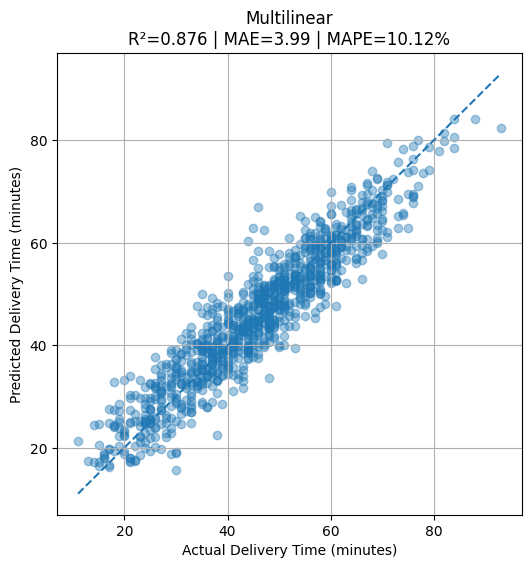


Polynomial (deg=2)
Fold 1: R2=0.8902, MAE=3.76, MAPE=9.31%
Fold 2: R2=0.8411, MAE=4.32, MAPE=9.99%
Fold 3: R2=0.8744, MAE=4.16, MAPE=10.97%
Fold 4: R2=0.8829, MAE=3.93, MAPE=9.96%
Fold 5: R2=0.8914, MAE=3.91, MAPE=10.38%


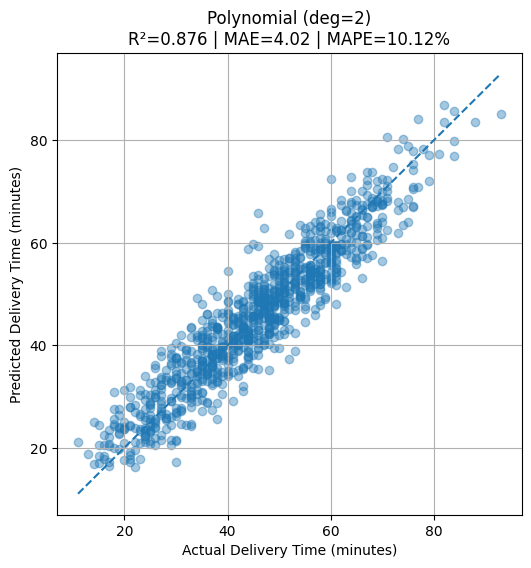


XGBoost
Fold 1: R2=0.8595, MAE=4.28, MAPE=10.88%
Fold 2: R2=0.8322, MAE=4.39, MAPE=10.32%
Fold 3: R2=0.8438, MAE=4.68, MAPE=12.20%
Fold 4: R2=0.8580, MAE=4.43, MAPE=11.45%
Fold 5: R2=0.8776, MAE=4.12, MAPE=10.77%


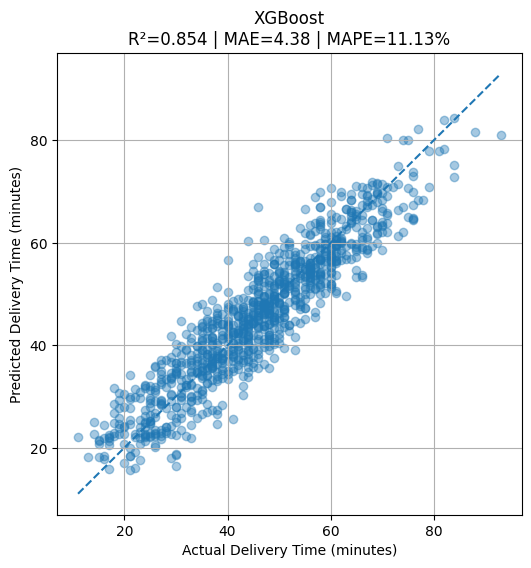


LightGBM
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 784, number of used features: 14
[LightGBM] [Info] Start training from score 45.802296
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

c:\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
c:\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Python39\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


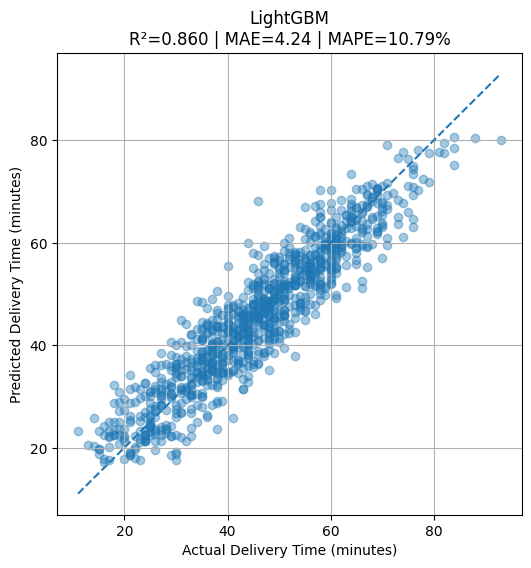


Model Comparison


,Model,Mean R2,Std R2,Mean MAE,Mean MAPE (%)
1,Polynomial (deg=2),0.8760,0.0206,4.0166,10.1227
0,Multilinear,0.8757,0.0196,3.9906,10.1174
3,LightGBM,0.8605,0.0217,4.2372,10.7876
2,XGBoost,0.8542,0.0172,4.3805,11.1264



Best performing model: Polynomial (deg=2)


In [39]:
#model setup
target = "delivery_time_minutes"

#numeric inputs
num_cols = [
    "distance_km",
    "traffic_level_ord",
    "IsWeekend"
]

#categorical inputs
cat_cols = ["weather_condition", "DayOfWeek"]

#cross-validation config
kf = KFold(n_splits=5, shuffle=True, random_state=42)


#load and clean data
data = dataset[num_cols + cat_cols + [target]].copy()

data[num_cols + [target]] = data[num_cols + [target]].apply(
    pd.to_numeric, errors="coerce"
)

#keep rows with valid target only
data = data.dropna(subset=[target])

X = data[num_cols + cat_cols]
y = data[target]

#preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
    ]
)

#models to compare
models = {

    "Multilinear": Pipeline([
        ("prep", preprocessor),
        ("reg", LinearRegression())
    ]),

    "Polynomial (deg=2)": Pipeline([
        ("prep", preprocessor),
        ("poly", PolynomialFeatures(degree=2, include_bias=False)),
        ("reg", LinearRegression())
    ]),

    "XGBoost": Pipeline([
        ("prep", preprocessor),
        ("reg", XGBRegressor(
            n_estimators=300,
            max_depth=5,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            objective="reg:squarederror",
            random_state=42
        ))
    ]),

    "LightGBM": Pipeline([
        ("prep", preprocessor),
        ("reg", LGBMRegressor(
            n_estimators=300,
            learning_rate=0.05,
            subsample=0.8,
            colsample_bytree=0.8,
            random_state=42
        ))
    ])
}

#cross-validation loop
summary = []

for model_name, model in models.items():

    fold_metrics = []
    y_true_all = []
    y_pred_all = []

    print(f"\n{model_name}")

    for fold, (tr, te) in enumerate(kf.split(X), 1):

        X_tr, X_te = X.iloc[tr], X.iloc[te]
        y_tr, y_te = y.iloc[tr], y.iloc[te]

        model.fit(X_tr, y_tr)
        pred = model.predict(X_te)

        y_true_all.extend(y_te)
        y_pred_all.extend(pred)

        r2 = r2_score(y_te, pred)
        mae = mean_absolute_error(y_te, pred)
        mape = np.mean(
            np.abs((y_te - pred) / np.where(y_te == 0, np.nan, y_te))
        ) * 100

        fold_metrics.append([r2, mae, mape])
        print(f"Fold {fold}: R2={r2:.4f}, MAE={mae:.2f}, MAPE={mape:.2f}%")

    fold_df = pd.DataFrame(
        fold_metrics, columns=["R2", "MAE", "MAPE"]
    )

    mean_r2 = fold_df["R2"].mean()
    mean_mae = fold_df["MAE"].mean()
    mean_mape = fold_df["MAPE"].mean()

    summary.append([
        model_name,
        mean_r2,
        fold_df["R2"].std(),
        mean_mae,
        mean_mape
    ])

    #Plot Pred vs Actual
    y_true_all = np.array(y_true_all)
    y_pred_all = np.array(y_pred_all)

    plt.figure(figsize=(6, 6))
    plt.scatter(y_true_all, y_pred_all, alpha=0.4)
    plt.plot(
        [y_true_all.min(), y_true_all.max()],
        [y_true_all.min(), y_true_all.max()],
        linestyle="--"
    )

    plt.title(
        f"{model_name}\n"
        f"R²={mean_r2:.3f} | MAE={mean_mae:.2f} | MAPE={mean_mape:.2f}%"
    )
    plt.xlabel("Actual Delivery Time (minutes)")
    plt.ylabel("Predicted Delivery Time (minutes)")
    plt.grid(True)
    plt.show()


#final comparison and winner
results = pd.DataFrame(
    summary,
    columns=["Model", "Mean R2", "Std R2", "Mean MAE", "Mean MAPE (%)"]
).sort_values(
    by=["Mean R2", "Mean MAE"],
    ascending=[False, True]
)

print("\nModel Comparison")
display(results.round(4))

best_model = results.iloc[0]["Model"]
print(f"\nBest performing model: {best_model}")


<h2>Model Deployment Pipeline<h2>

Polynomial with Degree of 2 as selected model

In [68]:
import numpy as np
import pandas as pd
import joblib

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder,
    OrdinalEncoder,
    PolynomialFeatures
)
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, mean_absolute_error

In [69]:
dataset = pd.read_csv(r"C:\Users\Amin Zaini\Downloads\junior-ds-takehome\src\delivery_data.csv")

print(f"Rows before cleaning: {len(dataset):,}")

dataset["timestamp"] = pd.to_datetime(dataset["timestamp"])
dataset["DayOfWeek"] = dataset["timestamp"].dt.dayofweek   
dataset["IsWeekend"] = dataset["DayOfWeek"].isin([5, 6]).astype(int)
dataset = dataset[(dataset["package_weight"] >= 0)]

target = "delivery_time_minutes"

num_cols = [
    "distance_km",
    "IsWeekend"
]

ordinal_cols = ["traffic_level"]
ordinal_order = [["Low", "Medium", "High"]]

cat_cols = ["weather_condition","DayOfWeek"]

data = dataset[num_cols + ordinal_cols + cat_cols + [target]].copy()

#convert target to numeric
data[target] = pd.to_numeric(data[target], errors="coerce")

#drop rows where ANY numeric column is negative
data = data[(data[num_cols] >= 0).all(axis=1)]

#drop rows with missing target
data = data.dropna(subset=[target])

print(f"Rows after removing negative values: {len(data):,}")

#split features and target
X = data.drop(columns=[target])
y = data[target]

#preprocessing Pipelines

#Numeric features
num_pipe = Pipeline(
    steps=[
        ("fill_missing", SimpleImputer(strategy="median")),
        ("scale", StandardScaler())
    ]
)

#ordinal feature
ordinal_pipe = Pipeline(
    steps=[
        ("fill_missing", SimpleImputer(strategy="most_frequent")),
        ("encode_order", OrdinalEncoder(categories=ordinal_order))
    ]
)

#categorical features
cat_pipe = Pipeline(
    steps=[
        ("fill_missing", SimpleImputer(strategy="most_frequent")),
        ("one_hot", OneHotEncoder( handle_unknown="ignore"))
    ]
)

#combine all preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", num_pipe, num_cols),
        ("ordinal", ordinal_pipe, ordinal_cols),
        ("categorical", cat_pipe, cat_cols)
    ]
)

#pipeline

model = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("polynomial", PolynomialFeatures(degree=2, include_bias=False)),
        ("regression", LinearRegression())
    ]
)

#cross Validation (Final check)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
results = []

for fold, (tr, te) in enumerate(kf.split(X), 1):

    X_tr, X_te = X.iloc[tr], X.iloc[te]
    y_tr, y_te = y.iloc[tr], y.iloc[te]

    model.fit(X_tr, y_tr)
    preds = model.predict(X_te)

    r2 = r2_score(y_te, preds)
    mae = mean_absolute_error(y_te, preds)

    results.append([r2, mae])

    print(f"Fold {fold}: R2={r2:.3f}, MAE={mae:.2f}")

results_df = pd.DataFrame(results, columns=["R2", "MAE"])

print("\nAverage CV Performance")
display(results_df.mean().round(4))

#train with full data for deployment
model.fit(X, y)

print("Final model trained using full dataset")

#save model weights
joblib.dump(model, r"C:\Users\Amin Zaini\Downloads\junior-ds-takehome\src\delivery_time_poly_model_with_pipeline.pkl")

print("Saved model weights")


Rows before cleaning: 1,000
Rows after removing negative values: 980
Fold 1: R2=0.890, MAE=3.76
Fold 2: R2=0.841, MAE=4.32
Fold 3: R2=0.874, MAE=4.16
Fold 4: R2=0.883, MAE=3.93
Fold 5: R2=0.891, MAE=3.91

Average CV Performance


R2     0.8760
MAE    4.0166
dtype: float64

Final model trained using full dataset
Saved model weights
